In [2]:
import numpy as np # this is for importing numpy library (and we will use abbreviation np for that)
import matplotlib.pyplot as plt # this is for importing matplotlib.pyplot (library for graph plot)
import scipy.io 
import pandas as pd # pandas, for reading datasets

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
# Read Data Using Pandas
train_data = pd.read_csv("/content/drive/My Drive/AI Study/Kaggle/연습장/train.csv")
test_data = pd.read_csv("/content/drive/My Drive/AI Study/Kaggle/연습장/test.csv")

[CSV into dataframe] : pandas.read_csv

https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

In [5]:
train_data.head() # 첫 다섯 행

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


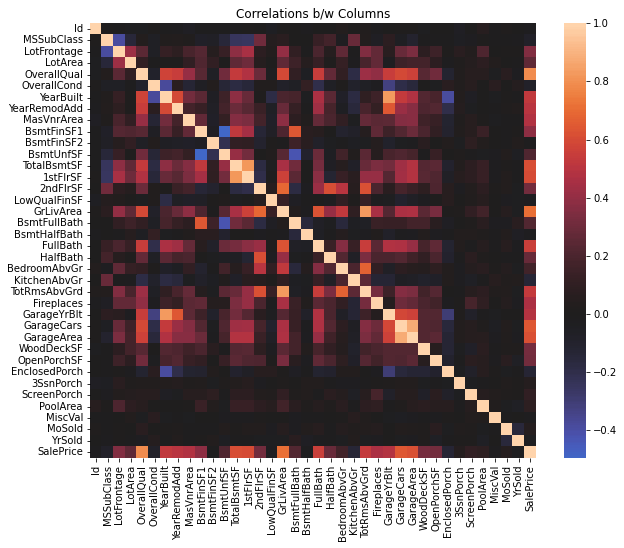

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 8))
sns.heatmap(train_data.corr(), center = 0)
plt.title("Correlations b/w Columns")
plt.show()

[Heatmap 관련 참고 링크] <br> https://rfriend.tistory.com/419

In [7]:
# Split input and target varialbles
X = train_data.drop(columns = ["SalePrice"], axis = 1)
y = train_data.SalePrice

In [8]:
X.shape, y.shape, test_data.shape

((1460, 80), (1460,), (1459, 80))

In [9]:
# Choose significant columns
corr_mat = train_data.corr()

In [10]:
corr_mat.head() # 첫 다섯 행만 출력

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982


In [11]:
corr_mat['SalePrice'][(corr_mat["SalePrice"] > 0.40) | (corr_mat["SalePrice"] < -0.40)]

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.477493
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
Fireplaces      0.466929
GarageYrBlt     0.486362
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [34]:
important_num_cols = list(corr_mat['SalePrice'][(corr_mat["SalePrice"] > 0.5) | (corr_mat["SalePrice"] < -0.5)].index)

important_num_cols.remove('SalePrice')
# 수치형 변수로 이루어진 Columns 만 추출됨
important_num_cols.append('sold-remodel')
important_num_cols.append('sold-built')
print(len(important_num_cols))

print(important_num_cols)

12
['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'sold-remodel', 'sold-built']


In [35]:
X_num_only = X[important_num_cols]

In [36]:
X_num_only.shape
print(X_num_only)

      OverallQual  YearBuilt  ...  sold-remodel  sold-built
0               7       2003  ...             5           5
1               6       1976  ...            31          31
2               7       2001  ...             6           7
3               7       1915  ...            36          91
4               8       2000  ...             8           8
...           ...        ...  ...           ...         ...
1455            6       1999  ...             7           8
1456            6       1978  ...            22          32
1457            7       1941  ...             4          69
1458            5       1950  ...            14          60
1459            5       1965  ...            43          43

[1460 rows x 12 columns]


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47196 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46108 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44163 missing from current font.
  font.set_

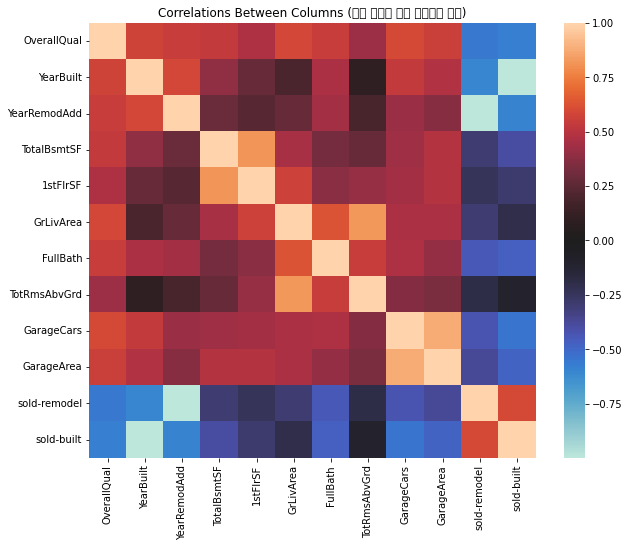

In [37]:
# Remove features which are highly correlated with each other
plt.figure(figsize = (10, 8))
sns.heatmap(X_num_only.corr(), center = 0)
plt.title("Correlations Between Columns (서로 연관된 것들 제거하기 위해)")
plt.show()

In [38]:
corr_X = X_num_only.corr()
print(len(corr_X))
print(corr_X)

12
              OverallQual  YearBuilt  ...  sold-remodel  sold-built
OverallQual      1.000000   0.572323  ...     -0.552570   -0.572629
YearBuilt        0.572323   1.000000  ...     -0.593868   -0.999036
YearRemodAdd     0.550684   0.592855  ...     -0.997930   -0.590360
TotalBsmtSF      0.537808   0.391452  ...     -0.292096   -0.391498
1stFlrSF         0.476224   0.281986  ...     -0.241310   -0.282143
GrLivArea        0.593007   0.199010  ...     -0.289805   -0.200302
FullBath         0.550600   0.468271  ...     -0.440413   -0.468403
TotRmsAbvGrd     0.427452   0.095589  ...     -0.194005   -0.096955
GarageCars       0.600671   0.537850  ...     -0.423236   -0.538727
GarageArea       0.562022   0.478954  ...     -0.373447   -0.479408
sold-remodel    -0.552570  -0.593868  ...      1.000000    0.594195
sold-built      -0.572629  -0.999036  ...      0.594195    1.000000

[12 rows x 12 columns]


In [39]:
# Print Data
for i in range(0, len(corr_X) - 1):
    for j in range(i + 1, len(corr_X)):
        if(corr_X.iloc[i, j] < -0.6 or corr_X.iloc[i, j] > 0.6): 
          # 연관성이 너무 높아서 중복된다고 판단되는 경우
            print(corr_X.iloc[i, j], i, j, corr_X.index[i], corr_X.index[j])
            

0.6006707165907149 0 8 OverallQual GarageCars
-0.9990359444033182 1 11 YearBuilt sold-built
-0.9979304500154548 2 10 YearRemodAdd sold-remodel
0.8195299750050339 3 4 TotalBsmtSF 1stFlrSF
0.6300116462511148 5 6 GrLivArea FullBath
0.8254893743088425 5 7 GrLivArea TotRmsAbvGrd
0.882475414281462 8 9 GarageCars GarageArea


In [40]:
num_cols = [i for i in X_num_only.columns if i not in ['1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'GarageArea', 'YearBuilt', 'YearRemodAdd']]
# 중복되는 것 들 중 하나씩만 남겨두고 제거
print(num_cols)

['OverallQual', 'TotalBsmtSF', 'GrLivArea', 'GarageCars', 'sold-remodel', 'sold-built']


In [41]:
X_final = X[num_cols]

In [42]:
X_final.shape

(1460, 6)

In [43]:
X_final

,OverallQual,TotalBsmtSF,GrLivArea,GarageCars,sold-remodel,sold-built
0,7,856,1710,2,5,5
1,6,1262,1262,2,31,31
2,7,920,1786,2,6,7
3,7,756,1717,3,36,91
4,8,1145,2198,3,8,8
...,...,...,...,...,...,...
1455,6,953,1647,2,7,8
1456,6,1542,2073,2,22,32
1457,7,1152,2340,1,4,69
1458,5,1078,1078,1,14,60


In [ ]:
# 리모델링한 연도 변수 조정 (이제는 사용 X)
# X_final['YearRemodAdd'] = X_final['YearRemodAdd'] - X_final['YearBuilt']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [44]:
X_final.head() # 첫 다섯 행만 추출

,OverallQual,TotalBsmtSF,GrLivArea,GarageCars,sold-remodel,sold-built
0,7,856,1710,2,5,5
1,6,1262,1262,2,31,31
2,7,920,1786,2,6,7
3,7,756,1717,3,36,91
4,8,1145,2198,3,8,8


변경할 사항 : Year_sold 에서 yearremodadd 를 빼서 데이터 재구성하기

[Combining DataFrames] https://ordo.tistory.com/51

[Deleting columns] https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html

[Renaming columns / index] https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html

In [24]:
temp = pd.DataFrame({'sold-remodel' : train_data['YrSold'] - train_data['YearRemodAdd'] })
temp2 = pd.DataFrame({'sold-built' : train_data['YrSold'] - train_data['YearBuilt'] })

In [25]:
X = pd.concat([X, temp], axis = 1)

In [26]:
X = pd.concat([X, temp2], axis = 1)

In [27]:
X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,sold-remodel,sold-built
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,5,5
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,31,31
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,6,7
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,36,91
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,8,8


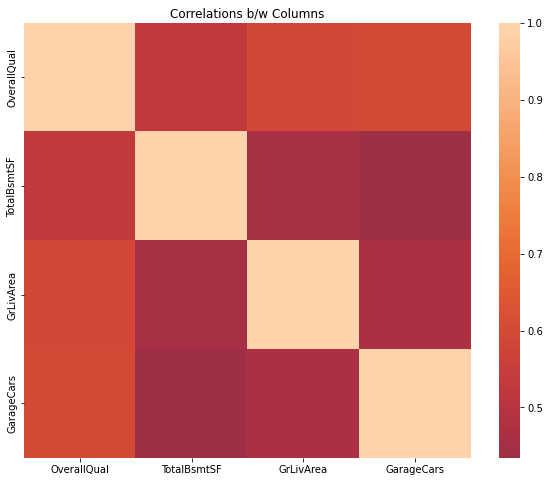

In [28]:
plt.figure(figsize = (10, 8))
sns.heatmap(X_final.corr(), center = 0)
plt.title("Correlations b/w Columns")
plt.show()

In [45]:
# handling missing data
X_final.isna().sum()

OverallQual     0
TotalBsmtSF     0
GrLivArea       0
GarageCars      0
sold-remodel    0
sold-built      0
dtype: int64

In [46]:
# Categorical columns - choose the important ones
cat_cols = ["MSZoning", "Utilities","BldgType","Heating","KitchenQual","SaleCondition","LandSlope"]
X[cat_cols].isna().sum()

MSZoning         0
Utilities        0
BldgType         0
Heating          0
KitchenQual      0
SaleCondition    0
LandSlope        0
dtype: int64

[isna()] : Nan 이면 True(1) 반환

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html

In [47]:
X_categorical_df = pd.get_dummies(X[cat_cols], columns = cat_cols)

In [48]:
X_categorical_df

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Utilities_AllPub,Utilities_NoSeWa,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
2,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
3,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
4,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
1456,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
1457,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
1458,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0


[pandas.get_dummies()]

https://devuna.tistory.com/67


https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

In [49]:
X_final = X_final.join(X_categorical_df)
X_final

,OverallQual,TotalBsmtSF,GrLivArea,GarageCars,sold-remodel,sold-built,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Utilities_AllPub,Utilities_NoSeWa,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
0,7,856,1710,2,5,5,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
1,6,1262,1262,2,31,31,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
2,7,920,1786,2,6,7,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
3,7,756,1717,3,36,91,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
4,8,1145,2198,3,8,8,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,953,1647,2,7,8,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
1456,6,1542,2073,2,22,32,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
1457,7,1152,2340,1,4,69,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
1458,5,1078,1078,1,14,60,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0


In [50]:
# Normalizing Data
from sklearn import preprocessing
standardize = preprocessing.StandardScaler().fit(X_final[num_cols])

In [51]:
standardize.mean_
# mean per column

array([   6.09931507, 1057.42945205, 1515.46369863,    1.76712329,
         22.95      ,   36.54794521])

In [52]:
# transform
X_final[num_cols] = standardize.transform(X_final[num_cols])
# 수치형 변수에 대해서만 정규화 작업 처리

[Normalization]

https://www.kdnuggets.com/2020/04/data-transformation-standardization-normalization.html

In [53]:
X_final

,OverallQual,TotalBsmtSF,GrLivArea,GarageCars,sold-remodel,sold-built,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Utilities_AllPub,Utilities_NoSeWa,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
0,0.651479,-0.459303,0.370333,0.311725,-0.869941,-1.043259,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
1,-0.071836,0.466465,-0.482512,0.311725,0.390141,-0.183465,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
2,0.651479,-0.313369,0.515013,0.311725,-0.821476,-0.977121,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
3,0.651479,-0.687324,0.383659,1.650307,0.632464,1.800676,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
4,1.374795,0.199680,1.299326,1.650307,-0.724547,-0.944052,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.071836,-0.238122,0.250402,0.311725,-0.773012,-0.944052,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
1456,-0.071836,1.104925,1.061367,0.311725,-0.046041,-0.150396,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
1457,0.651479,0.215641,1.569647,-1.026858,-0.918406,1.073157,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
1458,-0.795151,0.046905,-0.832788,-1.026858,-0.433759,0.775536,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0


In [54]:
# split training data and validation data

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_final, y, test_size = 0.2, random_state = 1)

In [55]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1168, 37), (292, 37), (1168,), (292,))

자료형 확인 및 변환

In [56]:
print(X_train)

      OverallQual  TotalBsmtSF  ...  LandSlope_Mod  LandSlope_Sev
921     -0.795151     0.489267  ...              0              0
520     -1.518467    -2.411167  ...              0              0
401      0.651479     0.575915  ...              0              0
280      0.651479    -0.571033  ...              0              0
1401    -0.071836    -0.498066  ...              0              0
...           ...          ...  ...            ...            ...
715     -0.071836     0.014982  ...              0              0
905     -0.795151    -0.003259  ...              0              0
1096    -0.071836    -0.851500  ...              0              0
235     -0.071836    -1.309823  ...              0              0
1061    -2.241782    -0.372654  ...              0              0

[1168 rows x 37 columns]


In [57]:
print(y_train)

921     145900
520     106250
401     164990
280     228500
1401    193000
         ...  
715     165000
905     128000
1096    127000
235      89500
1061     81000
Name: SalePrice, Length: 1168, dtype: int64


In [58]:
import torch
selected_X_train = X_train
torch_X_train = torch.from_numpy(selected_X_train.values).float()
print(torch_X_train)

tensor([[-0.7952,  0.4893,  1.3031,  ...,  1.0000,  0.0000,  0.0000],
        [-1.5185, -2.4112, -0.4216,  ...,  1.0000,  0.0000,  0.0000],
        [ 0.6515,  0.5759, -0.3911,  ...,  1.0000,  0.0000,  0.0000],
        ...,
        [-0.0718, -0.8515, -0.3055,  ...,  1.0000,  0.0000,  0.0000],
        [-0.0718, -1.3098, -1.0060,  ...,  1.0000,  0.0000,  0.0000],
        [-2.2418, -0.3727, -1.1831,  ...,  1.0000,  0.0000,  0.0000]])


X_val, Y_train, Y_val 도 동일하게

In [59]:
torch_X_val = torch.from_numpy(X_val.values).float()
torch_y_train = torch.from_numpy(y_train.values).float()
torch_y_val = torch.from_numpy(y_val.values).float()

In [60]:
print(torch_y_train.shape)
torch_y_train = torch_y_train.view([-1, 1])
print(torch_y_train.shape)
print(torch_y_train)
torch_y_val = torch_y_val.view([-1, 1])

torch.Size([1168])
torch.Size([1168, 1])
tensor([[145900.],
        [106250.],
        [164990.],
        ...,
        [127000.],
        [ 89500.],
        [ 81000.]])


New Training (Using Pytorch)

In [61]:
import numpy as np 
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset # 텐서 데이터셋
from torch.utils.data import DataLoader # 데이터 로더
import torch.nn.functional as F


import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt 

In [62]:
# Set hyperparameters and settings.
batch_size = 64
n_iter = 10000
learning_rate = 0.01

seed = 1
torch.manual_seed(seed) # by setting this, things will become reproducible (nothing is random)

In [99]:
# Define MLP classifier
class mlp_classifier(torch.nn.Module):
    # initialization
    def __init__(self):
        super(mlp_classifier, self).__init__()
        self.layer1 = torch.nn.Linear(37, 600)
        self.layer2 = torch.nn.Linear(600, 300)
        self.layer3 = torch.nn.Linear(300, 1)
        self.bn1 = torch.nn.BatchNorm1d(500)
        self.bn2 = torch.nn.BatchNorm1d(100)
        self.relu = torch.nn.LeakyReLU(0.3)
        self.dropout = nn.Dropout(0.6)
        # self.sig = torch.nn.Sigmoid()
    
    # forward path
    def forward(self, x):
        # x = x.view(-1, 37)
        x = self.layer1(x) # matrix multiplication
        # x = self.bn1(x)
        x = self.relu(x) # activation
        x = self.dropout(x)
        x = self.layer2(x)  # matrix multiplication
        # x = self.bn2(x)
        x = self.relu(x) # activation
        x = self.dropout(x)
        x = self.layer3(x) # matrix multiplication
        return x

In [100]:
model = mlp_classifier()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, betas=(0.9, 0.999), eps=1e-08, weight_decay=1e-6, amsgrad=False)
# Adam 에 momentum 이 포함되어 있음.

In [101]:
dataset_train = TensorDataset(torch_X_train.float(), torch_y_train.float())
dataloader_train = DataLoader(dataset_train, batch_size = batch_size, shuffle = True)
# dataloader : 데이터 순서를 계속해서 바꿔 주기 + 미니 배치 학습

dataset_val = TensorDataset(torch_X_val, torch_y_val)
dataloader_val = DataLoader(dataset_val, batch_size = batch_size, shuffle = True)

In [102]:
# Iteration 에 따른 오차를 저장할 배열
train_loss_iter = np.zeros(n_iter + 1, dtype=float)  
valid_loss_iter = np.zeros(n_iter + 1, dtype=float)

In [103]:
class RMSLELoss(nn.Module):
    def __init__(self):
        super().__init__()
        self.mse = nn.MSELoss()
        
    def forward(self, pred, actual):
        return torch.sqrt(self.mse(torch.log(pred + 1), torch.log(actual + 1)))

In [104]:
for iter in range(n_iter + 1): 
  # Training
  total_loss, total_cnt = 0.0, 0.0 # initialize a few variabels
  prediction = model(torch_X_train)
  # print(x.data.size(0))
  # print('x', x)
  # print('y', torch_y_train)
  # print('p', prediction)

  loss = RMSLELoss()
  cost = loss(prediction, torch_y_train)
  # cost = F.mse_loss(prediction, torch_y_train) ** 0.5 # Pytorch 에서 제공해 주는 MSE 함수 (회귀에서 사용) 에 sqrt
  
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()
  train_loss_iter[iter] = cost.item() # calculate and save loss (#accumulated-loss/#accumulated-data)


  # Validation
  total_loss, total_cnt = 0.0, 0.0 # initialize a few variabels
  with torch.no_grad(): # we do not need to calculation gradient for validation data
    prediction = model(torch_X_val) # Forward pass (of a mini-batch of validation data)
    cost = loss(prediction, torch_y_val) 
    valid_loss_iter[iter] = cost.item()  # calculate and save loss 

  # print message every 100 epochs
  if iter % 100 == 0:
      print(f"[{iter}/{n_iter}] Train Loss : {train_loss_iter[iter]:.4f} \
      Valid Loss : {valid_loss_iter[iter]:.4f} ")

[0/10000] Train Loss : 12.1378       Valid Loss : 10.1228 
[100/10000] Train Loss : 1.1403       Valid Loss : 1.1089 
[200/10000] Train Loss : 0.2274       Valid Loss : 0.2228 
[300/10000] Train Loss : 0.2099       Valid Loss : 0.2129 
[400/10000] Train Loss : 0.2075       Valid Loss : 0.2211 
[500/10000] Train Loss : 0.1989       Valid Loss : 0.2075 
[600/10000] Train Loss : 0.2013       Valid Loss : 0.2142 
[700/10000] Train Loss : 0.1926       Valid Loss : 0.2035 
[800/10000] Train Loss : 0.1892       Valid Loss : 0.1960 
[900/10000] Train Loss : 0.1931       Valid Loss : 0.1989 
[1000/10000] Train Loss : 0.1912       Valid Loss : 0.2012 
[1100/10000] Train Loss : 0.1876       Valid Loss : 0.1916 
[1200/10000] Train Loss : 0.1904       Valid Loss : 0.1974 
[1300/10000] Train Loss : 0.1840       Valid Loss : 0.1942 
[1400/10000] Train Loss : 0.1880       Valid Loss : 0.2051 
[1500/10000] Train Loss : 0.1890       Valid Loss : 0.1975 
[1600/10000] Train Loss : 0.1838       Valid Loss 

In [ ]:
# with mini-batch (사용 X)
# 생각해 보아야 할 점 : 오차 함수를 어떻게 정의할 것인가?

for iter in range(n_iter + 1): 
  # Training
  total_loss, total_cnt = 0.0, 0.0 # initialize a few variabels
  for batch_idx, samples in enumerate(dataloader_train):
    x, y = samples
    prediction = model(x)
    # print(x.data.size(0))
    # print('x', x)
    # print('y', torch_y_train)
    # print('p', prediction)

    loss = RMSLELoss()
    cost = loss(prediction, y)
    # cost = F.mse_loss(prediction, torch_y_train) ** 0.5 # Pytorch 에서 제공해 주는 MSE 함수 (회귀에서 사용) 에 sqrt
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # for visualization loss
    train_loss_iter[iter] = cost.item() # keep track of the training loss 
    total_loss += cost.item() # accumulate loss
    total_cnt += x.data.size(0) # accumulate the number of data

  train_loss_iter[iter] = total_loss / total_cnt # calculate and save loss (#accumulated-loss/#accumulated-data)


  # Validation
  total_loss, total_cnt = 0.0, 0.0 # initialize a few variabels
  for batch_idx, samples in enumerate(dataloader_val):  # for each mini-batch
    with torch.no_grad(): # we do not need to calculation gradient for validation data
      x, y = samples
      prediction = model(x) # Forward pass (of a mini-batch of validation data)
      cost = loss(prediction, y) 

      total_loss += cost.item() # accumulate loss (cost)
      total_cnt += x.data.size(0) # accumulate the number of data
      
  valid_loss_iter[iter]  = total_loss / total_cnt  # calculate and save loss 

  # print message every 100 epochs
  if iter % 100 == 0:
      print(f"[{iter}/{n_iter}] Train Loss : {train_loss_iter[iter]:.4f} \
      Valid Loss : {valid_loss_iter[iter]:.4f} ")

Old Training

In [275]:
# Regression

# import neccessary pakages
from sklearn.metrics import r2_score 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_log_error

In [276]:
perf = []; method = []

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_val)
r_squared = r2_score(predictions, y_val)

print("R2 Score:", r_squared)
rmsle = np.sqrt(mean_squared_log_error(predictions, y_val))
print("RMSLE:", rmsle)
method.append('Linear Regression')
perf.append(rmsle)

R2 Score: 0.7676972127157856
RMSLE: 0.21227697094258752


In [ ]:
# Ridge regression
ridge = Ridge()
ridge.fit(X_train, y_train)
predictions = ridge.predict(X_val)

r_squared = r2_score(predictions, y_val)

print("R2 Score:", r_squared)
method.append('Ridge Regression')

rmsle = np.sqrt(mean_squared_log_error(predictions, y_val))
print("RMSLE:", rmsle)
perf.append(rmsle)

R2 Score: 0.767784609858058
RMSLE: 0.20591278916879377


In [ ]:
# Lasso regression
lasso = Lasso()
lasso.fit(X_train, y_train)
predictions = lasso.predict(X_val)

r_squared = r2_score(predictions, y_val)

print("R2 Score:", r_squared)
method.append('Lasso Regression')

rmsle = np.sqrt(mean_squared_log_error(predictions, y_val))
print("RMSLE:", rmsle)
perf.append(rmsle)

R2 Score: 0.7677209359969116
RMSLE: 0.21125757835905873


In [277]:
# support vector regression
from sklearn.svm import SVR
svr = SVR(C=1000000)
svr.fit(X_train, y_train)
predictions = svr.predict(X_val)

r_squared = r2_score(predictions, y_val)

print("R2 Score:", r_squared)
#method.append('SVM')
rmsle = np.sqrt(mean_squared_log_error(predictions, y_val))
print("RMSLE:", rmsle)
#perf.append(rmsle)

R2 Score: 0.8751974626989193
RMSLE: 0.1646090382202258


In [278]:
svr_rbf = SVR(kernel="rbf", C=1000000, gamma=0.01, epsilon=0.1)
svr_rbf.fit(X_train, y_train)
predictions = svr_rbf.predict(X_val)

r_squared = r2_score(predictions, y_val)

print("R2 Score:", r_squared)

method.append('SVR')
rmsle = np.sqrt(mean_squared_log_error(predictions, y_val))
print("RMSLE:", rmsle)
perf.append(rmsle)

R2 Score: 0.8885930799122246
RMSLE: 0.14175644385928574


In [ ]:
#Random forest regressor
for i in range(50 , 500, 50):
    random_forest = RandomForestRegressor(n_estimators=i)
    random_forest.fit(X_train, y_train)
    predictions = random_forest.predict(X_val)

    r_squared = r2_score(predictions, y_val)

    print("R2 Score:", r_squared)
    method.append('Random Forest Regressor')
    rmsle = np.sqrt(mean_squared_log_error(predictions, y_val))
    print("RMSLE:", rmsle)
    perf.append(rmsle)

R2 Score: 0.8809244906622643
RMSLE: 0.15325516716160767
R2 Score: 0.8766748960178975
RMSLE: 0.15633493846095478
R2 Score: 0.8747602155270968
RMSLE: 0.15418050675964406
R2 Score: 0.8701247935768929
RMSLE: 0.1561922686217901
R2 Score: 0.8714649796287829
RMSLE: 0.15458411888260198
R2 Score: 0.8629815562984721
RMSLE: 0.15599518978030374
R2 Score: 0.8763653084530092
RMSLE: 0.1554399580057456
R2 Score: 0.8686201432531693
RMSLE: 0.15559658010966784
R2 Score: 0.8739190048175578
RMSLE: 0.15544257388590713


In [ ]:
# xgboost
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_val)

r_squared = r2_score(predictions, y_val)

print("R2 Score:", r_squared)
method.append('XGBoost Regressor')
rmsle = np.sqrt(mean_squared_log_error(predictions, y_val))
print("RMSLE:", rmsle)
perf.append(rmsle)

[14:23:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 Score: 0.9009739656856355
RMSLE: 0.14898627992773864


Text(0.5, 1.0, 'RMSLE comparison of models')

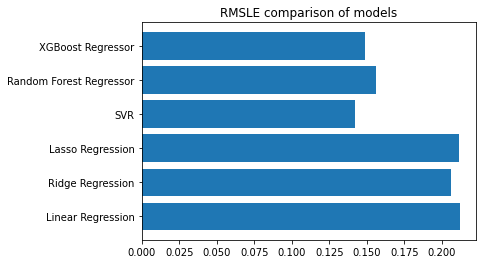

In [ ]:
# Compare performances of models
plt.barh(method, perf)
plt.title('RMSLE comparison of models')

## TESTING

In [69]:
# Test data modify
temp_test = pd.DataFrame({'sold-remodel' : test_data['YrSold'] - test_data['YearRemodAdd'] })
temp2_test = pd.DataFrame({'sold-built' : test_data['YrSold'] - test_data['YearBuilt'] })
test_data = pd.concat([test_data, temp_test], axis = 1)
test_data = pd.concat([test_data, temp2_test], axis = 1)

In [70]:
# Testing
# Test Data Preprocessing
X_test = test_data[num_cols + cat_cols]
print(num_cols)
# X_test['YearRemodAdd'] = X_test['YearRemodAdd'] - X_test['YearBuilt']


['OverallQual', 'TotalBsmtSF', 'GrLivArea', 'GarageCars', 'sold-remodel', 'sold-built']


In [71]:
X_test

,OverallQual,TotalBsmtSF,GrLivArea,GarageCars,sold-remodel,sold-built,MSZoning,Utilities,BldgType,Heating,KitchenQual,SaleCondition,LandSlope
0,5,882.0,896,1.0,49,49,RH,AllPub,1Fam,GasA,TA,Normal,Gtl
1,6,1329.0,1329,1.0,52,52,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
2,5,928.0,1629,2.0,12,13,RL,AllPub,1Fam,GasA,TA,Normal,Gtl
3,6,926.0,1604,2.0,12,12,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
4,8,1280.0,1280,2.0,18,18,RL,AllPub,TwnhsE,GasA,Gd,Normal,Gtl
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,546.0,1092,0.0,36,36,RM,AllPub,Twnhs,GasA,TA,Normal,Gtl
1455,4,546.0,1092,1.0,36,36,RM,AllPub,TwnhsE,GasA,TA,Abnorml,Gtl
1456,5,1224.0,1224,2.0,10,46,RL,AllPub,1Fam,GasA,TA,Abnorml,Gtl
1457,5,912.0,970,0.0,14,14,RL,AllPub,1Fam,GasA,TA,Normal,Gtl


In [72]:
X_test = pd.get_dummies(X_test)

In [73]:
X_test

,OverallQual,TotalBsmtSF,GrLivArea,GarageCars,sold-remodel,sold-built,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Utilities_AllPub,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
0,5,882.0,896,1.0,49,49,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
1,6,1329.0,1329,1.0,52,52,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
2,5,928.0,1629,2.0,12,13,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
3,6,926.0,1604,2.0,12,12,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
4,8,1280.0,1280,2.0,18,18,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,546.0,1092,0.0,36,36,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
1455,4,546.0,1092,1.0,36,36,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0
1456,5,1224.0,1224,2.0,10,46,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0
1457,5,912.0,970,0.0,14,14,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0


In [74]:
# add missing columns
X_test = X_test.reindex(columns = X_final.columns, fill_value = 0)

In [75]:
X_test

,OverallQual,TotalBsmtSF,GrLivArea,GarageCars,sold-remodel,sold-built,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Utilities_AllPub,Utilities_NoSeWa,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
0,5,882.0,896,1.0,49,49,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
1,6,1329.0,1329,1.0,52,52,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
2,5,928.0,1629,2.0,12,13,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
3,6,926.0,1604,2.0,12,12,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
4,8,1280.0,1280,2.0,18,18,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,546.0,1092,0.0,36,36,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
1455,4,546.0,1092,1.0,36,36,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0
1456,5,1224.0,1224,2.0,10,46,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0
1457,5,912.0,970,0.0,14,14,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0


[Pandas reindex] : 새로 정의한 index 에 맞게 다시 indexing

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reindex.html

In [76]:
# normalization
X_test[num_cols] = standardize.transform(X_test[num_cols])

In [77]:
X_test

,OverallQual,TotalBsmtSF,GrLivArea,GarageCars,sold-remodel,sold-built,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Utilities_AllPub,Utilities_NoSeWa,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
0,-0.795151,-0.400017,-1.179256,-1.026858,1.262505,0.411777,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
1,-0.071836,0.619239,-0.354966,-1.026858,1.407899,0.510984,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
2,-0.795151,-0.295127,0.216136,0.311725,-0.530688,-0.778707,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
3,-0.071836,-0.299687,0.168544,0.311725,-0.530688,-0.811776,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
4,1.374795,0.507509,-0.448246,0.311725,-0.239900,-0.613362,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-1.518467,-1.166169,-0.806136,-2.365440,0.632464,-0.018120,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
1455,-1.518467,-1.166169,-0.806136,-1.026858,0.632464,-0.018120,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0
1456,-0.795151,0.379817,-0.554851,0.311725,-0.627618,0.312570,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0
1457,-0.795151,-0.331610,-1.038384,-2.365440,-0.433759,-0.745638,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0


In [78]:
# handling missing values in test data (.isna() 이용)
X_test.isna().sum()

OverallQual              0
TotalBsmtSF              1
GrLivArea                0
GarageCars               1
sold-remodel             0
sold-built               0
MSZoning_C (all)         0
MSZoning_FV              0
MSZoning_RH              0
MSZoning_RL              0
MSZoning_RM              0
Utilities_AllPub         0
Utilities_NoSeWa         0
BldgType_1Fam            0
BldgType_2fmCon          0
BldgType_Duplex          0
BldgType_Twnhs           0
BldgType_TwnhsE          0
Heating_Floor            0
Heating_GasA             0
Heating_GasW             0
Heating_Grav             0
Heating_OthW             0
Heating_Wall             0
KitchenQual_Ex           0
KitchenQual_Fa           0
KitchenQual_Gd           0
KitchenQual_TA           0
SaleCondition_Abnorml    0
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
LandSlope_Gtl            0
LandSlope_Mod            0
LandSlope_Sev            0
d

In [79]:
# using median (Q2)
X_test['TotalBsmtSF'] = X_test['TotalBsmtSF'].fillna(train_data['TotalBsmtSF'].median())

In [80]:
# using mode (최빈값)
X_test['GarageCars'] = X_test['GarageCars'].fillna(train_data['GarageCars'].mode()[0])

In [81]:
X_test

,OverallQual,TotalBsmtSF,GrLivArea,GarageCars,sold-remodel,sold-built,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Utilities_AllPub,Utilities_NoSeWa,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
0,-0.795151,-0.400017,-1.179256,-1.026858,1.262505,0.411777,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
1,-0.071836,0.619239,-0.354966,-1.026858,1.407899,0.510984,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
2,-0.795151,-0.295127,0.216136,0.311725,-0.530688,-0.778707,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
3,-0.071836,-0.299687,0.168544,0.311725,-0.530688,-0.811776,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
4,1.374795,0.507509,-0.448246,0.311725,-0.239900,-0.613362,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-1.518467,-1.166169,-0.806136,-2.365440,0.632464,-0.018120,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
1455,-1.518467,-1.166169,-0.806136,-1.026858,0.632464,-0.018120,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0
1456,-0.795151,0.379817,-0.554851,0.311725,-0.627618,0.312570,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0
1457,-0.795151,-0.331610,-1.038384,-2.365440,-0.433759,-0.745638,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0


이것도 중앙값으로 변경 가능

test data --> torch

In [82]:
torch_X_test = torch.from_numpy(X_test.values).float()

In [97]:
# New prediction
preds = model(torch_X_test)

In [98]:
preds

tensor([[nan],
        [nan],
        [nan],
        ...,
        [nan],
        [nan],
        [nan]], grad_fn=<AddmmBackward0>)

In [91]:
px = pd.DataFrame(preds).astype("float")
px

,0
0,122697.796875
1,167345.296875
2,165218.546875
3,182294.125000
4,235492.000000
...,...
1454,84012.625000
1455,109031.562500
1456,147269.359375
1457,132999.390625


In [92]:
path = '/content/drive/My Drive/AI Study/Kaggle/연습장/temp.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  px.to_csv(f, index = False)

In [313]:
submit = pd.DataFrame({'Id' : test_data['Id'], 'SalePrice' : preds}).astype("float")
submit

RuntimeError: ignored

In [303]:
# Submission using SVR
preds = svr_rbf.predict(X_test)
submit = pd.DataFrame({'Id' : test_data['Id'], 'SalePrice' : preds})
submit

,Id,SalePrice
0,1461,120844.061642
1,1462,156335.599498
2,1463,176114.095348
3,1464,184687.526607
4,1465,192113.902835
...,...,...
1454,2915,86995.718679
1455,2916,88844.541266
1456,2917,144645.589856
1457,2918,128353.382605


In [ ]:
path = '/content/drive/My Drive/AI Study/Kaggle/연습장/submission.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  submit.to_csv(f, index = False)